In [20]:
%%javascript
try {
  require(['base/js/utils'], function (utils) {
    utils.load_extension('code_prettify/code_prettify');
    utils.load_extension('collapsible_headings/main'); 
    utils.load_extension('codefolding/edit'); 
    utils.load_extension('codefolding/main'); 
    utils.load_extension('execute_time/ExecuteTime');   
    utils.load_extension('toc2/main'); 
  });
}
catch (err) {
  console.log('toc2 load error:', err);
}

<IPython.core.display.Javascript object>

In [21]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [22]:
%load_ext autoreload
%autoreload 2


#import statments
import numpy as np
import pandas as pd
import io
from tqdm import tqdm
from __future__ import division

import DELCgen
# this is the package that actually generates the SFR histories
from DELCgen import *

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 24})
%config InlineBackend.rc = {}
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# amplitude
A=1
#slope on the short time scales
a_low=1
#slope on the longer time scales 
a_high=2
# intercept/offset: adds constant to the final output; not used it this work
c=0

# set frequency of the break
v_bend_Example1=1.0/(20)

In [24]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

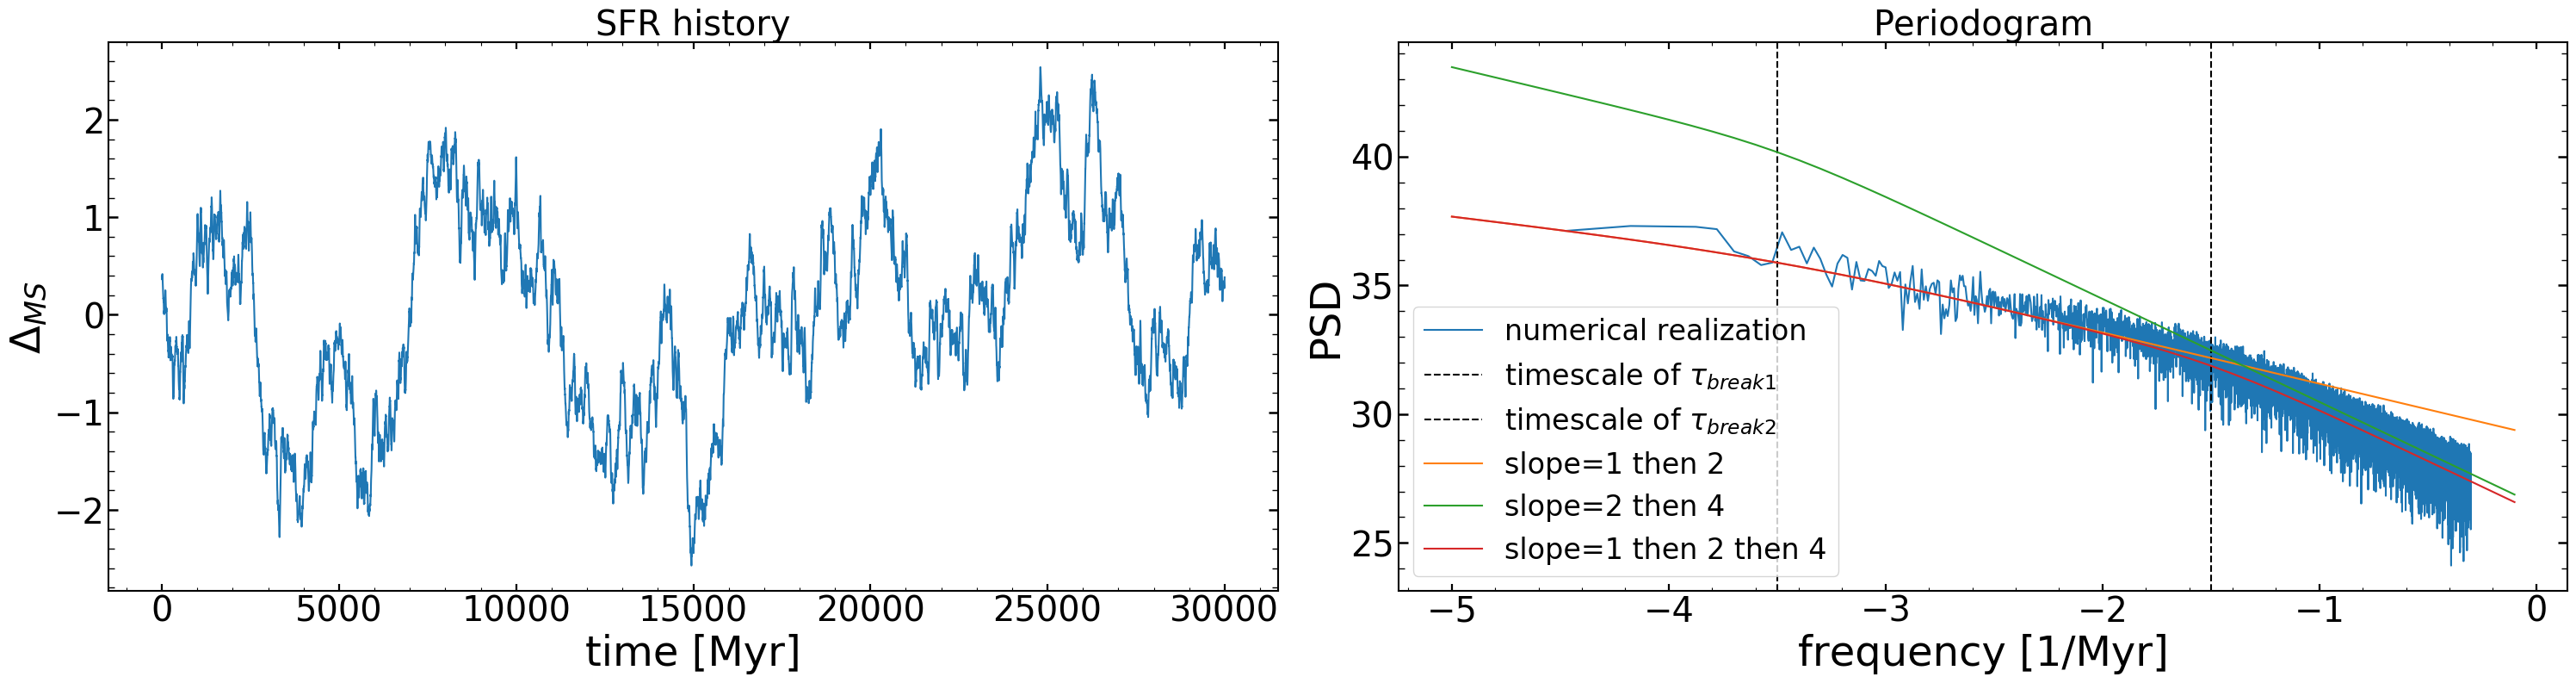

In [25]:
v_bend_1=1.0/(10**3.5)
v_bend_2=1.0/(10**1.5)
delc_2_3 =Simulate_TK_Lightcurve(Bending2PL, (A,v_bend_1,v_bend_2,a_low,a_high,0),RedNoiseL=1,aliasTbin=1,tbin = 1,length=30000,randomSeed=1234)

v_bend_1_index=list(np.arange(-5,+0,0.1)).index(find_nearest(np.arange(-5,+0,0.1),np.log10(v_bend_1)))
v_bend_2_index=list(np.arange(-5,+0,0.1)).index(find_nearest(np.arange(-5,+0,0.1),np.log10(v_bend_2)))

v_bend_1_delc_index=list(np.log10(delc_2_3.freq)).index(find_nearest(np.log10(delc_2_3.freq),np.log10(v_bend_1)))
v_bend_2_delc_index=list(np.log10(delc_2_3.freq)).index(find_nearest(np.log10(delc_2_3.freq),np.log10(v_bend_2)))

PSD_2=[]
PSD_4=[]
PSD_2_4=[]
for v in 10**(np.arange(-5,+0,0.1)):
    PSD_2.append(BendingPL(v,A,v_bend_1,a_low,a_high,c))
    PSD_4.append(BendingPL(v,A,v_bend_1,a_high,a_high+2,c))
    PSD_2_4.append(Bending2PL(v,A,v_bend_1,v_bend_2,a_low,a_high,c))

#############################################
# Plot showing created movement around Main Sequence, the periodogram, the structure function and the ACF
# shown for the example with tau_{break} = 100, i.e., example 2
plt.figure(figsize=(30,8))
plt.subplot(121)
plt.plot(delc_2_3.flux)
plt.title('SFR history')
plt.xlabel('time [Myr]')
plt.ylabel('$\\Delta_{MS}$ ')

plt.subplot(122)
plt.plot(np.log10(delc_2_3.periodogram[0]),np.log10(delc_2_3.periodogram[1]),label='numerical realization')
#plt.plot(np.log10(frequency),np.log10(explicit2)+np.log10(delc_flux_2_3.periodogram[1])[0]-np.log10(explicit2)[0],lw=5,label='analytical form')
plt.axvline(np.log10(v_bend_1),ls='--',color='black',label='timescale of $\\tau_{break1}$')
plt.axvline(np.log10(v_bend_2),ls='--',color='black',label='timescale of $\\tau_{break2}$')
plt.title('Periodogram')
plt.xlabel('frequency [1/Myr]')
plt.ylabel('PSD')

plt.plot(np.arange(-5,+0,0.1),np.log10(PSD_2)-np.log10(PSD_2)[v_bend_1_index]+np.log10(delc_2_3.periodogram[1])[v_bend_1_delc_index], label='slope='+str(a_low)+' then '+str(a_high),)
plt.plot(np.arange(-5,+0,0.1),np.log10(PSD_4)-np.log10(PSD_4)[v_bend_2_index]+np.log10(delc_2_3.periodogram[1])[v_bend_2_delc_index], label='slope='+str(a_high)+' then '+str(a_high+2))
plt.plot(np.arange(-5,0,0.1),np.log10(PSD_2_4)-np.log10(PSD_2_4)[v_bend_1_index]+np.log10(delc_2_3.periodogram[1])[v_bend_1_delc_index], label='slope='+str(a_low)+' then '+str(a_high)+' then '+str(a_high+2))

plt.legend()



plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)